### Loading and inspecting the data.

In [2]:
#Importing pandas as pd
import pandas as pd

In [3]:
#Reading csv file
filepath = "DataFiles/songs.csv"
df = pd.read_csv(filepath)

In [4]:
#Inspecting data
df.head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34


In [5]:
df.shape

(50000, 7)

In [6]:
df = df.rename(columns={"Duration":"Duration in Minutes"})

In [7]:
df

,Title,Artist,Album,Genre,Release Date,Duration in Minutes,Popularity
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34
...,...,...,...,...,...,...,...
49995,Thing.,Brandon Thomas,Lawyer sign.,Rock,2008-06-07,300,95
49996,Option.,Barry White,Cold.,Pop,2016-09-06,220,23
49997,Ability ever.,Leah Obrien,Trade.,Blues,2013-10-16,257,79
49998,Occur claim who.,Ashley James,Explain moment.,Jazz,2018-03-06,262,22


### Cleaning and preparing the data.

In [9]:
df.isnull().sum()

Title                  0
Artist                 0
Album                  0
Genre                  0
Release Date           0
Duration in Minutes    0
Popularity             0
dtype: int64

In [10]:
df[df.duplicated()]

,Title,Artist,Album,Genre,Release Date,Duration in Minutes,Popularity


In [11]:
q3 = df["Duration in Minutes"].quantile(0.75)
q1 = df["Duration in Minutes"].quantile(0.25)

iqr = q3-q1

upper_bound=q3+1.5*iqr
lower_bound = q1-1.5*iqr

print(upper_bound)
print(lower_bound)

391.5
27.5


In [12]:
df=df[(df['Duration in Minutes'] >= lower_bound) & (df['Duration in Minutes'] <= upper_bound)]

In [13]:
df.shape

(50000, 7)

In [14]:
q3 = df["Popularity"].quantile(0.75)
q1 = df["Popularity"].quantile(0.25)

iqr = q3-q1

upper_bound=q3+1.5*iqr
lower_bound = q1-1.5*iqr

print(upper_bound)
print(lower_bound)

152.5
-51.5


In [15]:
df=df[(df['Popularity'] >= lower_bound) & (df['Popularity'] <= upper_bound)]

In [16]:
df.shape

(50000, 7)

### Performing data manipulation.

In [18]:
df.head()

,Title,Artist,Album,Genre,Release Date,Duration in Minutes,Popularity
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34


In [19]:
df.groupby("Genre")["Album"].count()

Genre
Blues         5101
Classical     4972
Country       5176
Electronic    4968
Hip-Hop       5033
Jazz          4939
Pop           5026
R&B           4973
Reggae        4946
Rock          4866
Name: Album, dtype: int64

In [20]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [21]:
# Define the date you want to filter by
date_filter = pd.to_datetime("2010-12-31")

# Filter the DataFrame
First_Decade = df[df['Release Date'] <= date_filter]
First_Decade

,Title,Artist,Album,Genre,Release Date,Duration in Minutes,Popularity
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34
5,Turn child.,Jessica Martin,Cold according.,R&B,2006-09-16,207,58
6,Old.,Cheyenne Powell,Oil.,Country,2010-04-23,163,72
...,...,...,...,...,...,...,...
49986,Fly live.,Katie Rodriguez,Guess sometimes.,Rock,2007-01-17,299,4
49990,Land recent bank.,Christopher Silva,Long.,Pop,2009-08-06,163,2
49993,By population message.,Madeline Dickson,Mean.,Classical,2005-02-13,142,59
49995,Thing.,Brandon Thomas,Lawyer sign.,Rock,2008-06-07,300,95


In [22]:
# Which genre had the highest count between 2000 to 2010(first_decade)

First_Decade.groupby("Genre")["Release Date"].count()

Genre
Blues         2762
Classical     2578
Country       2706
Electronic    2600
Hip-Hop       2660
Jazz          2564
Pop           2632
R&B           2608
Reggae        2519
Rock          2580
Name: Release Date, dtype: int64

In [23]:
#Total count for the first_decade
First_Decade_Count=First_Decade["Genre"].count()
First_Decade_Count

26209

In [48]:
# Define the date you want to filter by
#date_filter1 = pd.to_datetime("2020-12-31")

# Filter the DataFrame
Second_Decade = df[df['Release Date'] >= "2011-01-01"]
Second_Decade

,Title,Artist,Album,Genre,Release Date,Duration in Minutes,Popularity
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59
8,Agency employee present.,Brandon Henderson,Might live.,Country,2020-02-18,243,69
9,Face become we.,Raymond White,Probably camera.,Blues,2011-11-07,177,55
10,Couple bank.,Paul Stephens,And.,Reggae,2016-03-31,245,76
...,...,...,...,...,...,...,...
49992,Determine middle.,Maria Everett,Character describe.,Hip-Hop,2012-05-20,299,37
49994,Among.,Jennifer Taylor,Team main.,Pop,2013-05-15,204,50
49996,Option.,Barry White,Cold.,Pop,2016-09-06,220,23
49997,Ability ever.,Leah Obrien,Trade.,Blues,2013-10-16,257,79


In [50]:
# Which genre had the highest count between 2011 to 2020(second_decade)

Second_Decade.groupby("Genre")["Release Date"].count()

Genre
Blues         2339
Classical     2394
Country       2470
Electronic    2368
Hip-Hop       2373
Jazz          2375
Pop           2394
R&B           2365
Reggae        2427
Rock          2286
Name: Release Date, dtype: int64

In [52]:
#Total count for the second_decade
Second_Decade_Count=Second_Decade["Genre"].count()
Second_Decade_Count

23791

In [56]:
Percentage_Increase_between_decades= ((Second_Decade_Count-First_Decade_Count)/First_Decade_Count)*100
print(First_Decade_Count)
print(Second_Decade_Count)
print(Percentage_Increase_between_decades)

26209
23791
-9.225838452440001


#### Summary for the first and second decade 
Comparative Analysis:
Overall Decline: The number of releases for all genres decreased in the second decade compared to the first.

Blues: Experienced a significant decrease from 2,762 to 2,339 releases.
Classical: Had a slight decrease from 2,578 to 2,394 releases.
Country: Reduced from 2,706 to 2,470 releases.
Electronic: Decreased from 2,600 to 2,368 releases.
Hip-Hop: Slightly decreased from 2,660 to 2,373 releases.
Jazz: Had a slight decrease from 2,564 to 2,375 releases.
Pop: Reduced from 2,632 to 2,394 releases.
R&B: Decreased from 2,608 to 2,365 releases.
Reggae: Saw a slight reduction from 2,519 to 2,427 releases.
Rock: Experienced a notable decrease from 2,580 to 2,286 release


In [60]:
First_Decade.groupby("Genre")["Popularity"].sum()

Genre
Blues         136816
Classical     130989
Country       134882
Electronic    129253
Hip-Hop       132678
Jazz          129983
Pop           133671
R&B           132582
Reggae        128671
Rock          129652
Name: Popularity, dtype: int64

In [62]:
Second_Decade.groupby("Genre")["Popularity"].sum()

Genre
Blues         115783
Classical     121022
Country       125286
Electronic    118127
Hip-Hop       118806
Jazz          120082
Pop           119628
R&B           118188
Reggae        122897
Rock          114196
Name: Popularity, dtype: int64

#### Summary of the popularity based on Genre for the First and Second Decade
Overall Decline: The total popularity scores for all genres decreased in the second decade compared to the first.
Blues: Experienced a significant decrease in popularity from 136,816 to 115,783.
Classical and Country: Both saw a decline, with Classical reducing to 121,022 and Country to 125,286.
Pop and Hip-Hop: Both genres also saw declines, with Pop dropping to 119,628 and Hip-Hop to 118,806.
Reggae: Experienced a lesser decline in popularity compared to other genres.

In [82]:
df_duration=df[["Duration in Minutes","Popularity"]]
df_duration

,Duration in Minutes,Popularity
0,262,71
1,187,37
2,212,58
3,272,59
4,131,34
...,...,...
49995,300,95
49996,220,23
49997,257,79
49998,262,22


In [84]:
df_duration.head(20)

,Duration in Minutes,Popularity
0,262,71
1,187,37
2,212,58
3,272,59
4,131,34
5,207,58
6,163,72
7,183,73
8,243,69
9,177,55


In [86]:
df[["Duration in Minutes","Popularity"]].mean()

Duration in Minutes    209.74290
Popularity              50.26384
dtype: float64

#### Duration in Minutes versus Popularity
Content Duration: The average duration of 209.74 minutes suggests that your content tends to be on the longer side. This could be a factor in determining how it aligns with user preferences.

Popularity Level: With an average popularity score of 50.26, the content is experiencing a moderate level of engagement. There is room for improvement to increase this average score

On average, the duration of the content is about 209.74 minutes. This indicates that most of your content is relatively long, though there is variability in individual durations.

On average, the popularity score is around 50.26. This suggests a moderate level of engagement or interest in the content.








In [91]:
df.groupby("Genre").agg({"Duration in Minutes":["sum","mean","max","min"]})

Duration in Minutes                      
                           sum        mean  max  min
Genre                                               
Blues                  1070646  209.889433  300  120
Classical              1047862  210.752615  300  120
Country                1082050  209.051391  300  120
Electronic             1041113  209.563808  300  120
Hip-Hop                1051160  208.853566  300  120
Jazz                   1034456  209.446447  300  120
Pop                    1050741  209.061082  300  120
R&B                    1045228  210.180575  300  120
Reggae                 1036545  209.572382  300  120
Rock                   1027344  211.127004  300  120

#### Duration Statistics by Genre
Average Duration Across Genres: The average duration of content is relatively consistent across different genres, with values ranging from about 208.85 to 211.13 minutes.
Maximum Duration: All genres have a maximum duration of 300 minutes, indicating the upper limit for the content length.
Minimum Duration: The minimum duration is uniform across genres at 120 minutes.
The average durations are quite close to each other, suggesting that content length is relatively uniform across genres.
The maximum duration of 300 minutes is consistent for all genres, which could indicate a standard or ceiling for content length.

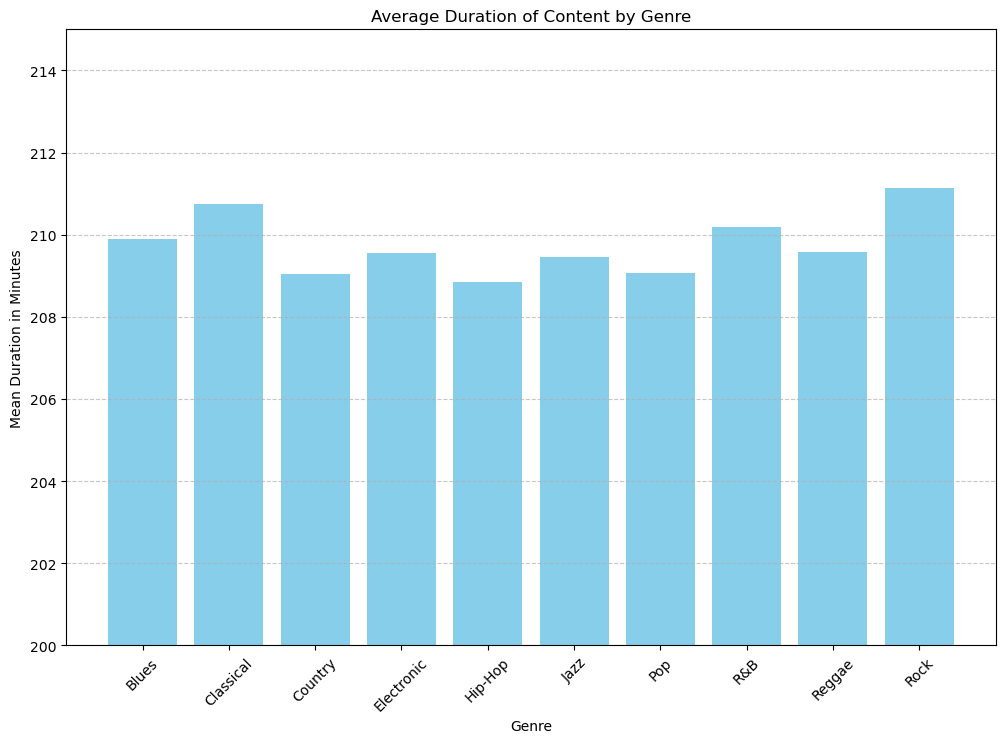

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Genre': ['Blues', 'Classical', 'Country', 'Electronic', 'Hip-Hop', 'Jazz', 'Pop', 'R&B', 'Reggae', 'Rock'],
    'Sum': [1070646, 1047862, 1082050, 1041113, 1051160, 1034456, 1050741, 1045228, 1036545, 1027344],
    'Mean': [209.889433, 210.752615, 209.051391, 209.563808, 208.853566, 209.446447, 209.061082, 210.180575, 209.572382, 211.127004],
    'Max': [300, 300, 300, 300, 300, 300, 300, 300, 300, 300],
    'Min': [120, 120, 120, 120, 120, 120, 120, 120, 120, 120]
}

df = pd.DataFrame(data)

# Plotting the bar graph for Mean Duration
plt.figure(figsize=(12, 8))
plt.bar(df['Genre'], df['Mean'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean Duration in Minutes')
plt.title('Average Duration of Content by Genre')
plt.xticks(rotation=45)
plt.ylim(200, 215)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()